In [2]:
import csv
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyreadr import pyreadr
from matplotlib import pyplot

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

In [3]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.rds') # also works for RData
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame
df2=df[df['subject']=='02']
df2

,trial,condition,threat,pair,shock,shockPrior,time.start,time.end,sample.start,sample.end,CR,subject,diagnostic,pairs,ln_cr
160,1,31.0,1.0,3.0,False,False,217.120,225.120,108561,112560.0,0.06562,02,Eyes,2,0.063557
161,2,36.0,6.0,3.0,False,False,225.410,233.410,112706,116705.0,0.05036,02,Eyes,2,0.049133
162,3,26.0,6.0,2.0,False,False,233.816,241.816,116909,120908.0,0.07477,02,Mouth/Nose,2,0.072107
163,4,21.0,1.0,2.0,False,False,242.788,250.788,121395,125394.0,0.05951,02,Mouth/Nose,2,0.057807
164,5,31.0,1.0,3.0,False,False,251.634,259.634,125818,129817.0,0.07935,02,Eyes,2,0.076359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,156,34.0,4.0,3.0,False,False,1801.046,1809.046,900524,904523.0,0.05798,02,Eyes,2,0.056361
316,157,25.0,5.0,2.0,False,False,1810.958,1818.958,905480,909479.0,0.05493,02,Mouth/Nose,2,0.053474
317,158,31.0,1.0,3.0,False,False,1819.596,1827.596,909799,913798.0,0.11902,02,Eyes,2,0.112453
318,159,21.0,1.0,2.0,False,False,1829.580,1837.580,914791,918790.0,0.09461,02,Mouth/Nose,2,0.090398


In [4]:
df['subject'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '13', '15', '16', '17',
       '19', '21', '22', '23', '25', '26', '27', '28', '30', '31', '32',
       '33', '41', '43', '44', '45', '46', '47', '48', '50', '51', '52',
       '54'], dtype=object)

In [5]:
df['CR'].max()

9.838899999999999

In [6]:
df['CR'].min()

0.0320399999999994

CR potrebbe essere la skin response from 0.03 to 9.84

ln_cr è la CR scaled with a log to reduce the skew of the amplitude distribution

threat -> da 1 a 6
probably
1 cs-
2 gs1
3 gs2
4 gs3
5 gs4
6 cs+

try to use this cr colomn in this rds, what is the sampling rate? un dato ogni 8 secondi


    sampling rate = num lines/durata esperimento

In [7]:
num_lines= len(df['CR'])
print(num_lines)

5440


In [8]:
start_exp=df['time.start'].min()
print(start_exp)

0.478


In [9]:
end_exp=df['time.end'].max()
print(end_exp)

2271.302


In [10]:
sampl_r=(end_exp-start_exp)/num_lines
sampl_r

0.4174308823529412

se ipotizzo sampling rate di 500hz e lo moltiplico per la lunghezza del sample dovrei ottenere il tempo totale  ma 10 sec è un tempo ridicolo quindi sampling rate <<500hz

In [11]:
0.002*num_lines

10.88

In [12]:
rows['CDA.Tonic'].plot()

NameError: name 'rows' is not defined

# analisi file eda uno per uno

## riassumendo

eda 4 file dati

a) file 01.txt solo CH1
1 file per ogni partecipante con sampling rate noto (500HZ)
più di 1.4 M rows
quindi il segnale totale dura circa 284992 secondi
segnale che contiene sum di phasic e tonic
il vantaggio di questo tipo di file è che siamo già sincronizzati con heart (a meno di latenze)

colonne
CH1 --> eda
CH2 --> heartrate
CH28 --> trigger

b)01_era.txt
1 file per ogni partecipante senza sampling rate
188 righe
durata segnale boh
contiene phasic e tonic già divisa
forse dati costruiti using Continuous Decomposition Analysis dai file 01.txt avrebbe senso con una certa media (che in teoria serve a dividere thonic da phasic)

'Event.Nr' --> int da 0 a 188
'CDA.nSCR' --> int da 0 a 4
'CDA.Latency' --> flot from 0.5 to 3.0
'CDA.AmpSum' --> float from 0 to 1.3
'CDA.SCR' --> float from 0 to 0.1 forse valori di skin conductance response (phasic values)
'CDA.ISCR' --> flot from 0 to 5.5 forse valori di integrated skin conductance response ( uguale a 'CDA.SCR'*45 )
'CDA.PhasicMax' --> float from 0 to 6.1 (molto simile a ISCR)
'CDA.Tonic' --> float from 9.9 to 10.9 forse valori della parte tonic
'TTP.nSCR' --> int from 0 to 2 pare nessuna relazione con CDA.nSCR
'TTP.Latency' --> float from 0.5 to 2.8 non capisco se correlata o meno a CDA latency
'TTP.AmpSum' --> float from 0 to 1.3 sembra correlato con CDA.ampsum
'Global.Mean' --> float from 9.9 to 11.7 mean ma di cosa?
'Global.MaxDeflection' --> float from 0 to 1 deflection de che? dalla media?
'Event.NID' --> solo 1 o 2 direi useless
'Event.Name' --> solo "1" o "2" direi useless



c)eda.ucr.rds
1 file per tutti
contiene 1 solo value per ogni paziente 'ucr'

'subject' --> boolean
'ucr' --> unconditioned? conductance response
'valid' --> float from 0 to 1
'include' --> boolean sembra correlato con valid (sembra una sua approssimazione)
'ln_ucr' -->  unconditioned? conductance response con una trasformazione logaritmica

come se ucr fosse una baseline per ogni paziente?


d)eda.rds
1 file unico con 1 dato ogni trial
info su trial, threat, paziente
'trial' --> informazione sul trial (da 1 a 160)
'condition' --> data dall'unione di pair e threat (pair+threat)
'threat' --> da 1 a 6 (1:cs- 2:gs1 3:gs2 4:gs3 5:gs4 6:cs+)
'pair' --> da 1 a 4
'shock' --> boolean
'shockPrior' --> boolean
'time.start' --> time.end-8
'time.end' -->
'sample.start' --> differisce di un fattore moltiplicato k circa 500 da time.start
'sample.end' --> differisce di un fattore moltiplicato k circa 500 da time.end
'CR' --> conductance response
'subject' --> paziente
'diagnostic' --> region of interest
'pairs' --> 1 o 2 legato a pair?
'ln_cr' --> conductance response con una trasformazione logaritmica


## a) file 01.txt

In [15]:
# 01.txt
df_txt = pd.read_csv("tmp_eda01.csv")
df_txt = df_txt['CH1']
df_txt

0          7.968140
1          7.968140
2          7.969670
3          7.971190
4          7.969670
             ...   
1421031   -0.004578
1421032   -0.001526
1421033   -0.003052
1421034   -0.003052
1421035   -0.003052
Name: CH1, Length: 1421036, dtype: float64

decompose into tonic e phasic

## b)01_era.txt

In [99]:
#era.txt
with open('osfstorage-archive/physio/ledalab/01_era.txt') as f:
    lines = f.readlines()
lines = list(lines)
lines = [line.replace('\n', "") for line in lines]
lines[:10]
columns = lines[0].split('\t')
rows = [row.split("\t") for row in lines[1:]]

with open('csv_tmp', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(columns)
    write.writerows(rows)

# creating csv
df_era = pd.read_csv("csv_tmp")
df_era

,Event.Nr,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name
0,1,1,0.7000,0.0244,0.0022,0.1122,0.2498,10.8763,0,NaN,0.0000,11.4711,0.0000,1,"""1"""
1,2,0,NaN,0.0000,0.0000,0.0000,0.0744,10.8938,0,NaN,0.0000,11.1498,0.0000,1,"""1"""
2,3,0,NaN,0.0000,0.0007,0.0336,0.0650,10.8682,0,NaN,0.0000,11.0742,0.0000,1,"""1"""
3,4,0,NaN,0.0000,0.0000,0.0000,0.0640,10.8041,0,NaN,0.0000,10.8177,0.0002,1,"""1"""
4,5,0,NaN,0.0000,0.0006,0.0308,0.1070,10.7588,0,NaN,0.0000,10.8920,0.0000,1,"""1"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,0,NaN,0.0000,0.0001,0.0066,0.0308,10.1959,0,NaN,0.0000,10.2236,0.0000,1,"""1"""
184,185,0,NaN,0.0000,0.0017,0.0874,0.0885,10.0783,0,NaN,0.0000,10.0974,0.0000,1,"""1"""
185,186,0,NaN,0.0000,0.0007,0.0375,0.0594,9.9771,0,NaN,0.0000,9.9960,0.0000,1,"""1"""
186,187,0,NaN,0.0000,0.0011,0.0540,0.0622,9.9160,0,NaN,0.0000,9.9495,0.0000,1,"""1"""


In [300]:
diff = np.subtract(df_era['CDA.Latency'].astype(float),df_era['TTP.Latency'].astype(float))
diff

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
183    NaN
184    NaN
185    NaN
186    NaN
187    0.7
Length: 188, dtype: float64

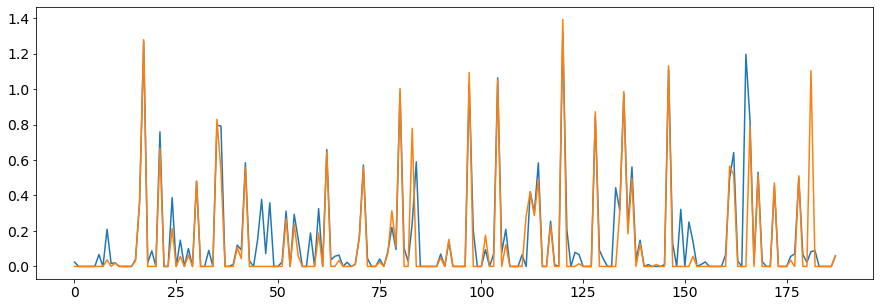

In [108]:
pyplot.plot(df_era['CDA.AmpSum'])
pyplot.plot(df_era['TTP.AmpSum'])

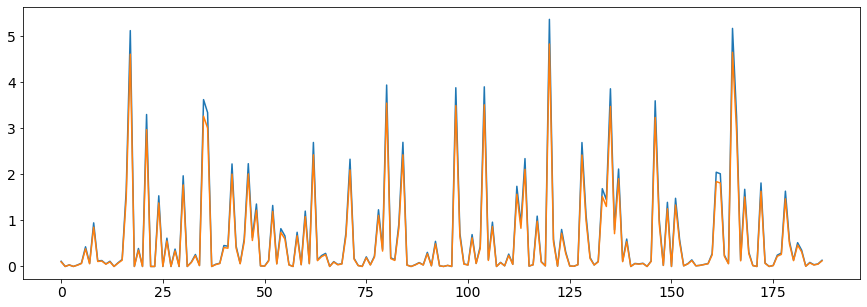

In [123]:
pyplot.plot(df_era['CDA.ISCR'])
pyplot.plot(df_era['CDA.SCR']*45)

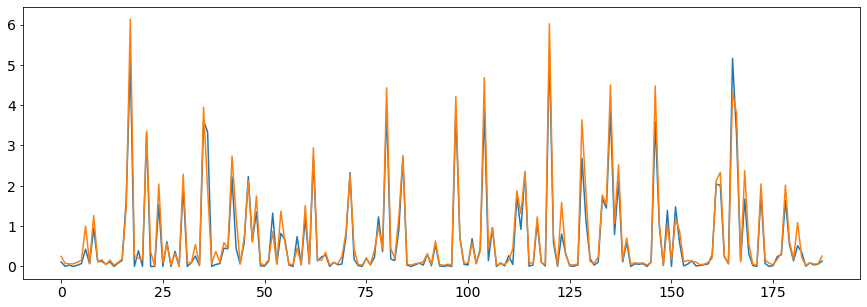

In [121]:
pyplot.plot(df_era['CDA.ISCR'])
pyplot.plot(df_era['CDA.PhasicMax'])

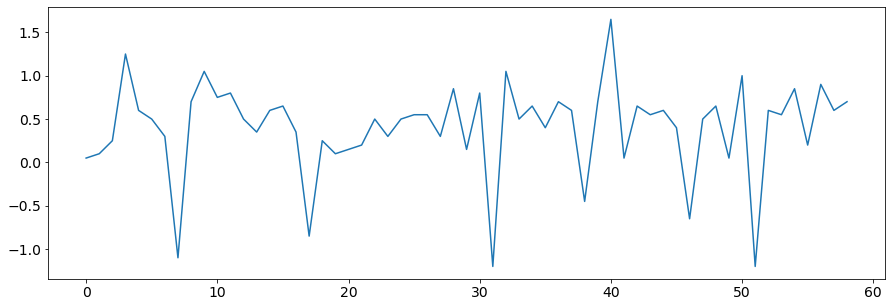

In [100]:
#analyze diff between latency

cda_lat=np.array(df_era['CDA.Latency']).astype(float)
ttp_lat=np.array(df_era['TTP.Latency']).astype(float)
res = np.subtract(cda_lat,ttp_lat)
res = res[~np.isnan(res)]

pyplot.plot(res)

## c)eda.ucr.rds

In [95]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.ucr.rds')
df = result[None]
df

,subject,ucr,valid,include,ln_ucr
0,01,0.595864,0.964286,True,0.467415
1,02,0.182724,0.607143,True,0.167820
2,03,2.262556,0.928571,True,1.182511
3,04,0.328662,0.535714,True,0.284173
4,05,2.557275,1.000000,True,1.268995
5,06,1.313674,0.857143,True,0.838837
6,07,3.398168,1.000000,True,1.481188
7,08,0.000000,0.000000,False,0.000000
8,10,0.000000,0.000000,False,0.000000
9,12,0.015531,0.142857,False,0.015412


/home/paolo/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


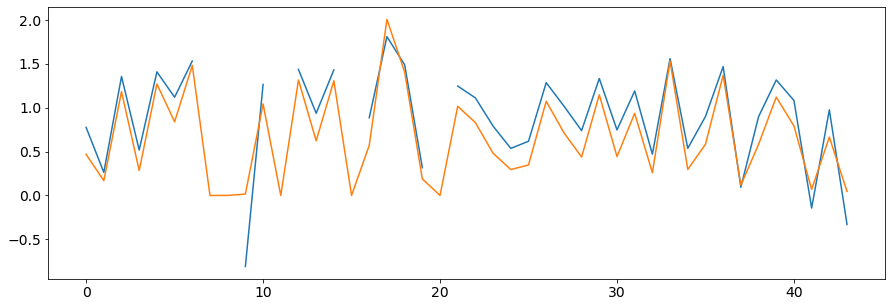

In [165]:
pyplot.plot(np.log10(df['ucr'])+1)
pyplot.plot(df['ln_ucr'])

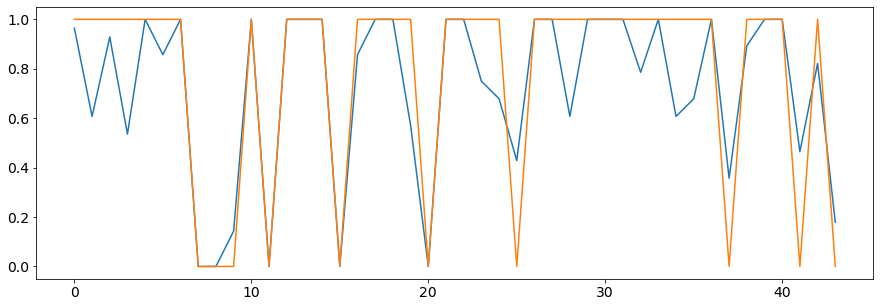

In [159]:
pyplot.plot(df['valid'])
pyplot.plot(df['include'])

## d)eda.rds

In [285]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.rds')
df = result[None]
df

,trial,condition,threat,pair,shock,shockPrior,time.start,time.end,sample.start,sample.end,CR,subject,diagnostic,pairs,ln_cr
0,1,41.0,1.0,4.0,False,False,616.526,624.526,308264,312263.0,0.66840,01,Mouth/Nose,1,0.511865
1,2,46.0,6.0,4.0,False,False,624.790,632.790,312396,316395.0,0.38910,01,Mouth/Nose,1,0.328656
2,3,16.0,6.0,1.0,False,False,633.256,641.256,316629,320628.0,0.41810,01,Eyes,1,0.349318
3,4,11.0,1.0,1.0,False,False,642.756,650.756,321379,325378.0,0.21970,01,Eyes,1,0.198605
4,5,41.0,1.0,4.0,False,False,651.614,659.614,325808,329807.0,0.29140,01,Mouth/Nose,1,0.255727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,156,34.0,4.0,3.0,False,False,1655.886,1663.886,827944,831943.0,0.07477,54,Eyes,2,0.072107
5436,157,25.0,5.0,2.0,False,False,1665.870,1673.870,832936,836935.0,0.07324,54,Mouth/Nose,2,0.070682
5437,158,31.0,1.0,3.0,False,False,1675.928,1683.928,837965,841964.0,0.07935,54,Eyes,2,0.076359
5438,159,21.0,1.0,2.0,False,False,1685.374,1693.374,842688,846687.0,0.07172,54,Mouth/Nose,2,0.069265


In [295]:
(df['sample.end']-df['sample.start']).unique()

array([3999., 3999., 3999., 3999., 3999., 3999., 3999., 3999., 3999.,
       3999., 3999., 3999., 3999., 3999.])

In [294]:
(df['time.end']-df['time.start']).unique()

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

In [292]:
df_=df
df_['pair'] = df_['pair'].apply(np.int64).astype(str)
df_['threat'] = df_['threat'].apply(np.int64).astype(str)
df_['pair_threat'] = df_['pair']+df_['threat']
df_['pair_threat'] = df_['pair_threat'].astype(float)
np.subtract(df_['condition'],df_['pair_threat']).unique()

array([0.])

la colonna condition è data esattamente dall'unione di pair e threat

(0.0, 200.0)

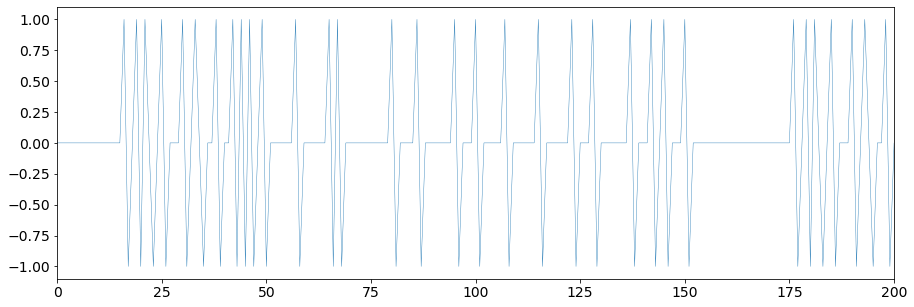

In [215]:
shock_=[1 if x=='True' else 0 for x in df['shock']]
shockprior_=[1 if x=='True' else 0 for x in df['shockPrior']]
x_ = (np.subtract(shock_,shockprior_))
y_ = [x for x in range(0,len(x))]
pyplot.plot(y_,x_,linewidth=0.4)
pyplot.xlim(0,200)

In [227]:
print('count -1: '+str(list(x_).count(-1)))
print('count 1: '+str(list(x_).count(1)))
print('count 0: '+str(list(x_).count(0)))

count -1: 884
count 1: 884
count 0: 3672


Essendoci la maggioranza di valori a 0 la maggior parte di valori di shock pror e shock coincidono

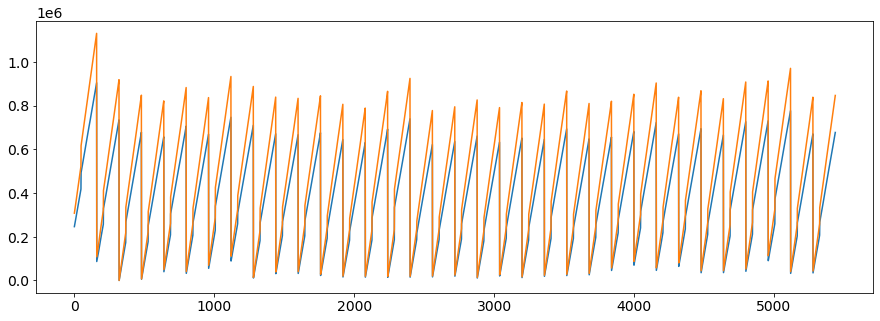

In [248]:
pyplot.plot(df['time.start']*400)
pyplot.plot(df['sample.start'])

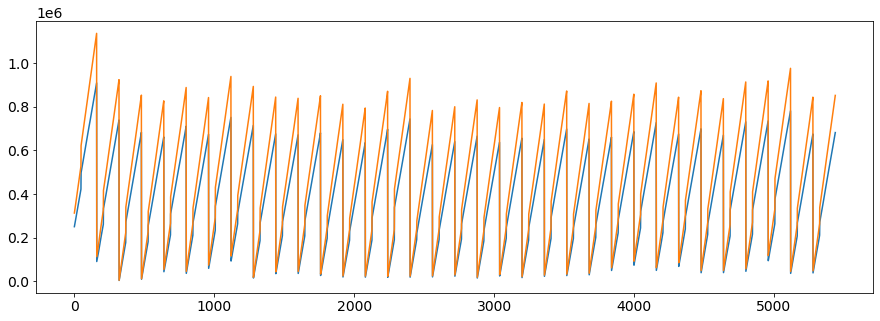

In [249]:
pyplot.plot(df['time.end']*400)
pyplot.plot(df['sample.end'])

In [266]:
print(df['condition'].sort_values().unique())

[11. 12. 13. 14. 15. 16. 21. 22. 23. 24. 25. 26. 31. 32. 33. 34. 35. 36.
 41. 42. 43. 44. 45. 46.]


# paragone 01.txt e 01_era.txt

read 01_era.txt

In [4]:
with open('osfstorage-archive/physio/ledalab/01_era.txt') as f:
    lines = f.readlines()
lines = list(lines)
lines = [line.replace('\n', "") for line in lines]
lines[:10]
columns = lines[0].split('\t')
rows = [row.split("\t") for row in lines[1:]]

with open('csv_tmp', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(columns)
    write.writerows(rows)

# creating csv
rows_era = pd.read_csv("csv_tmp")
rows_era

,Event.Nr,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name
0,1,1,0.7000,0.0244,0.0022,0.1122,0.2498,10.8763,0,NaN,0.0000,11.4711,0.0000,1,"""1"""
1,2,0,NaN,0.0000,0.0000,0.0000,0.0744,10.8938,0,NaN,0.0000,11.1498,0.0000,1,"""1"""
2,3,0,NaN,0.0000,0.0007,0.0336,0.0650,10.8682,0,NaN,0.0000,11.0742,0.0000,1,"""1"""
3,4,0,NaN,0.0000,0.0000,0.0000,0.0640,10.8041,0,NaN,0.0000,10.8177,0.0002,1,"""1"""
4,5,0,NaN,0.0000,0.0006,0.0308,0.1070,10.7588,0,NaN,0.0000,10.8920,0.0000,1,"""1"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,0,NaN,0.0000,0.0001,0.0066,0.0308,10.1959,0,NaN,0.0000,10.2236,0.0000,1,"""1"""
184,185,0,NaN,0.0000,0.0017,0.0874,0.0885,10.0783,0,NaN,0.0000,10.0974,0.0000,1,"""1"""
185,186,0,NaN,0.0000,0.0007,0.0375,0.0594,9.9771,0,NaN,0.0000,9.9960,0.0000,1,"""1"""
186,187,0,NaN,0.0000,0.0011,0.0540,0.0622,9.9160,0,NaN,0.0000,9.9495,0.0000,1,"""1"""


read 01.txt

In [15]:
for i in range(1,56):
    path = r"./osfstorage-archive/physio/"
    ext=".txt"
    new_name="tmp_eda"

    if i<10:
        path = path+"0"
        new_name =new_name+"0"

    filename=path+str(i)+ext
    new_name=new_name+str(i)+".csv"

    try:
        with open(filename, 'r') as fp:
            lines = (fp.readlines())
    except FileNotFoundError as e:
        continue

    if("EDA" not in lines[3]):
        print("error not eda file")
        break

    lines_eda_good = lines[11:]
    lines_eda_good = [line.replace("\t", " ") for line in lines_eda_good]
    lines_eda_good = [line.replace("\n", "") for line in lines_eda_good]

    fields = ["CH1","CH2","CH28"]
    rows = [ row.split(" ") for row in lines_eda_good ]
    rows = [row[:3] for row in rows]
    with open(new_name, 'w') as f:

        # using csv.writer method from CSV package
        write = csv.writer(f)

        write.writerow(fields)
        write.writerows(rows)


KeyboardInterrupt: 

In [16]:
data_real = pd.read_csv("tmp_eda01.csv")
len(data_real)


1421036

In [17]:
eda_real = data_real['CH1']
eda_real

0          7.968140
1          7.968140
2          7.969670
3          7.971190
4          7.969670
             ...   
1421031   -0.004578
1421032   -0.001526
1421033   -0.003052
1421034   -0.003052
1421035   -0.003052
Name: CH1, Length: 1421036, dtype: float64

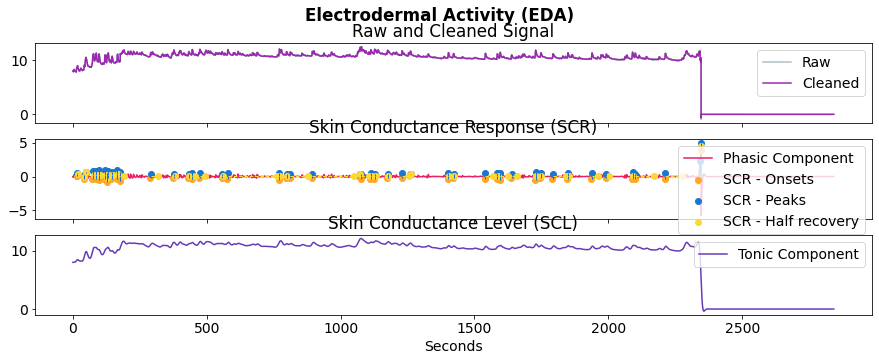

In [18]:
signals_txt, info_txt = nk.eda_process(eda_real, sampling_rate=500,method="neurokit")
# Visualise the processing
nk.eda_plot(signals_txt, sampling_rate=500)

plt.show()

In [38]:
signals_txt
signals_txt_ = signals_txt.reset_index(drop=False)
signals_txt_ = signals_txt[['EDA_Phasic','EDA_Tonic']]
signals_txt_[:8650].mean()

EDA_Phasic    0.002118
EDA_Tonic     8.133835
dtype: float64

In [28]:
list_txt_ph = signals_txt_['EDA_Phasic']
list_txt_to = signals_txt_['EDA_Tonic']

In [29]:
rows_era_ = rows_era.reset_index(drop=False)
rows_era_ = rows_era[['CDA.SCR','CDA.Tonic']]
rows_era_

,CDA.SCR,CDA.Tonic
0,0.0022,10.8763
1,0.0000,10.8938
2,0.0007,10.8682
3,0.0000,10.8041
4,0.0006,10.7588
...,...,...
183,0.0001,10.1959
184,0.0017,10.0783
185,0.0007,9.9771
186,0.0011,9.9160


In [22]:
list_era_ph = rows_era_['CDA.SCR']
list_era_to = rows_era_['CDA.Tonic']

In [23]:
min_ = min(len(list_txt_ph),len(list_era_ph))
min_

188

In [24]:
range_=len(list_txt_ph)-len(list_era_ph)
range_

1420848

vediamo se c'è qualche tipo di correlazione tra queste due cose

In [25]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(list_era_ph)[:min_]
    y_simple = np.array(list_txt_ph)[i:min_+i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ",max_rho,index_max)
print("min ",min_rho,index_min)

max  0.1542801651798713 906213
min  -0.16239934833250197 1304674


non sembra esserci correlazione apparente, ma magari i secondi sono un qualche tipo di media? come lo verifico?

In [26]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(list_era_to)[:min_]
    y_simple = np.array(list_txt_to)[i:min_+i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ",max_rho,index_max)
print("min ",min_rho,index_min)

KeyboardInterrupt: 

# sync pupil e file .txt ch1

In [10]:
import csv
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyreadr import pyreadr

In [11]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

remove patients non valid for eda

In [12]:
notvalid = [x for x in range(34,41)]
notvalid.append(9)

valid_patients_eda = [ele for ele in range(1,56) if ele not in notvalid]
valid_patients_eda

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

remove patients non valid for pupil

In [13]:
notvalid = [x for x in range(34,41)]
notvalid.extend([9,20,25,42])

valid_patients_pupil = [ele for ele in range(1,56) if ele not in notvalid]
valid_patients_pupil

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

select patients with either pupil and eda data

In [14]:
valid_pupil_eda = intersection = list(set(valid_patients_eda).intersection(set(valid_patients_pupil)))
valid_pupil_eda

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

## test with first person

extract pupil data of the first patient

In [18]:
# person 1
pupil1 = pd.read_csv('../osfstorage-archive/eye/pupil/Look001_pupil.csv', sep=';')
for i in (pupil1.columns):
    if i != 'trial':
        for j in pupil1.index:
            pupil1.loc[j, i] = pupil1.loc[j, i].replace(',', '.')
cols = pupil1.columns.drop('trial')

pupil1[cols] = pupil1[cols].apply(pd.to_numeric, errors='coerce')

In [19]:
pupil1

,trial,pd1,pd2,pd3,pd4,pd5,pd6,pd7,pd8,pd9,...,pd691,pd692,pd693,pd694,pd695,pd696,pd697,pd698,pd699,pd700
0,1,1.962859,1.962459,1.962083,1.961742,1.961452,1.961224,1.961075,1.961018,1.961065,...,2.082965,2.082997,2.082784,2.082345,2.081702,2.080884,2.079921,2.078845,2.077688,2.076477
1,2,2.006727,2.006155,2.005554,2.004930,2.004287,2.003630,2.002966,2.002301,2.001641,...,2.087581,2.088914,2.090180,2.091370,2.092475,2.093493,2.094421,2.095258,2.096007,2.096670
2,3,2.033697,2.033830,2.034030,2.034307,2.034671,2.035134,2.035701,2.036376,2.037158,...,2.119693,2.120457,2.121158,2.121796,2.122370,2.122880,2.123324,2.123704,2.124020,2.124275
3,4,1.976467,1.976325,1.976168,1.975997,1.975810,1.975607,1.975389,1.975153,1.974902,...,2.088751,2.090593,2.092342,2.094004,2.095585,2.097085,2.098506,2.099845,2.101097,2.102259
4,5,1.953766,1.954989,1.956288,1.957657,1.959089,1.960576,1.962112,1.963690,1.965301,...,2.025596,2.026268,2.026895,2.027472,2.027995,2.028464,2.028877,2.029238,2.029547,2.029809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,156,1.931342,1.929214,1.926909,1.924430,1.921784,1.918977,1.916018,1.912914,1.909677,...,2.044166,2.043665,2.043047,2.042320,2.041492,2.040574,2.039581,2.038530,2.037440,2.036332
156,157,1.863730,1.865210,1.866741,1.868308,1.869900,1.871504,1.873109,1.874706,1.876284,...,1.957294,1.957469,1.957620,1.957750,1.957860,1.957955,1.958036,1.958106,1.958167,1.958220
157,158,1.912139,1.911845,1.911546,1.911248,1.910956,1.910676,1.910413,1.910173,1.909960,...,2.052764,2.052389,2.051991,2.051574,2.051140,2.050694,2.050240,2.049782,2.049325,2.048875
158,159,1.927763,1.924728,1.921788,1.918994,1.916386,1.913996,1.911845,1.909948,1.908309,...,2.184578,2.184446,2.184223,2.183921,2.183551,2.183128,2.182666,2.182179,2.181677,2.181171


In [20]:
# convert all datas into one list
pat1_pupil = []
for i in range(160):
    colonne = pupil1.columns.drop(['trial'])
    for colonna in colonne:
        pat1_pupil.append(pupil1.loc[i][colonna])
pat1_pupil

[1.96285857246005,
 1.9624585182853,
 1.96208254593662,
 1.96174249724518,
 1.96145171554016,
 1.96122445230387,
 1.96107517867964,
 1.96101783605988,
 1.96106503721927,
 1.961227299219,
 1.96151244181316,
 1.96192524797592,
 1.96246722665371,
 1.96313639918554,
 1.96392732838597,
 1.96483141029487,
 1.96583717521354,
 1.9669303978296,
 1.96809399327224,
 1.96930784934637,
 1.97054869634696,
 1.97178998959547,
 1.97300180918046,
 1.97415083926245,
 1.97520052113634,
 1.97611137435132,
 1.97684137529976,
 1.97734633857016,
 1.97758024466739,
 1.97749548152223,
 1.97704304219909,
 1.9761728046846,
 1.97483409227958,
 1.97297652058376,
 1.9705510622495,
 1.96751133484899,
 1.96381494993575,
 1.95942480161691,
 1.95431047816026,
 1.94845009953754,
 1.94183273155655,
 1.93446124128041,
 1.92635534127469,
 1.91755466490185,
 1.90812190742402,
 1.89814644474412,
 1.88774883068114,
 1.87708578008522,
 1.86635490353104,
 1.85579885489827,
 1.8457086155317,
 1.83642603047722,
 1.82834539956799,


sampling rate of pupil data --> 100hz

Plot pupil

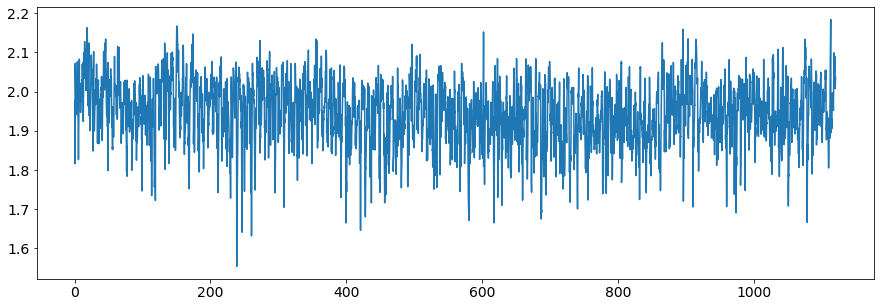

In [21]:
X = np.arange(0, 7*160, 0.01)
Y = list(pat1_pupil)
plt.plot(X, Y)
plt.show()

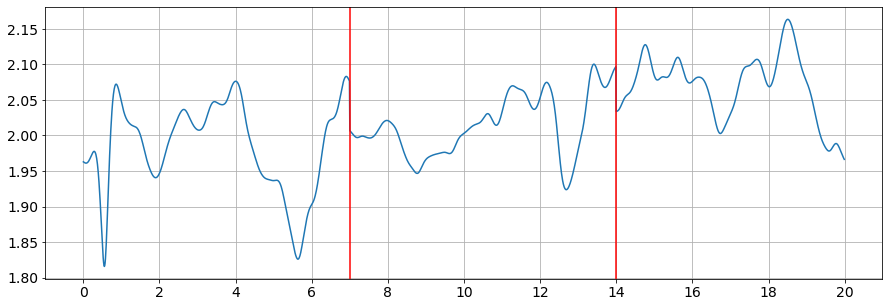

In [22]:
# first 20 seconds
X_20 = X[:20*100]
Y_20 = Y[:20*100]
plt.plot(X_20, Y_20)
plt.axvline(7, color='red')
plt.axvline(14, color='red')
plt.xticks(np.arange(0,21,2))
plt.grid()
plt.show()

extract eda data of patient 1

In [24]:
pat1_eda = pd.read_csv("../tmp_eda01.csv")['CH1']
pat1_eda.to_numpy()

array([ 7.96814e+00,  7.96814e+00,  7.96967e+00, ..., -3.05201e-03,
       -3.05201e-03, -3.05201e-03])

eda ha sampling rate di 500hz, pupil di 100hz.

In [25]:
print('len eda data '+str(len(pat1_eda)))
print('len pupil data '+str(len(pat1_pupil)))

len eda data 1421036
len pupil data 112000


In [26]:
(1421036/160)*0.002

17.76295

downsample eda data to 500hz to 100hz. I take only one sample every 5

In [27]:
pat1_eda_new = []

for x in range(len(pat1_eda)):
    if x%5==0:
        pat1_eda_new.append(pat1_eda[x])

eda con 100hz

In [28]:
len(pat1_eda_new)

284208

In [29]:
len(pat1_pupil)

112000

### divide eda into tonic e phasic

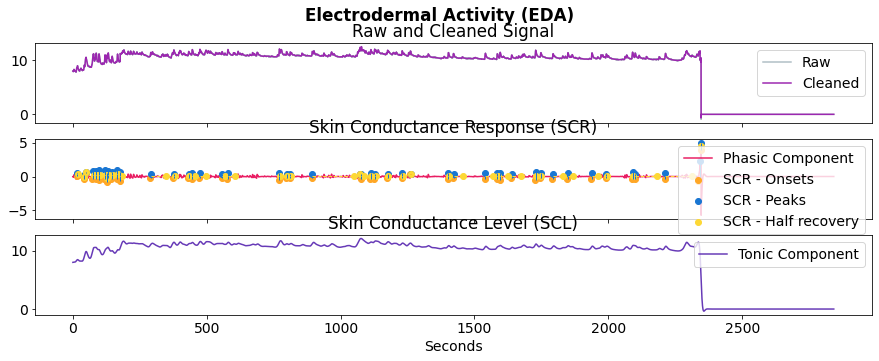

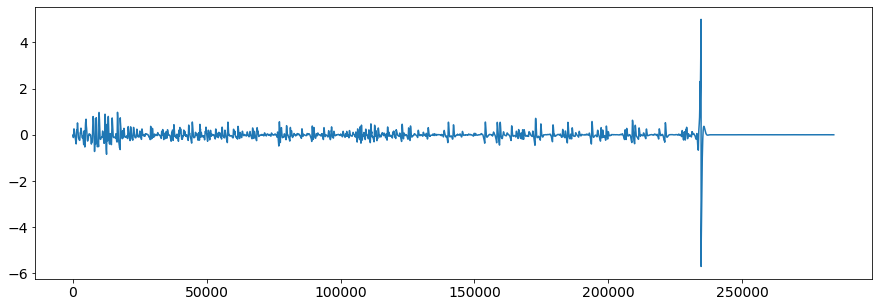

In [33]:
signals, info = nk.eda_process(pat1_eda_new, sampling_rate=100)
nk.eda_plot(signals, sampling_rate=100)
pat1_eda_phasic = signals['EDA_Phasic']
plt.show()
plt.plot(pat1_eda_phasic)

from this plot it seems that values after max aren't good so i decided to cut before this the signal

In [34]:
cut_index = pat1_eda_phasic[pat1_eda_phasic > 1].index.min()
cut_index

234130

In [51]:
pat1_eda_new = pat1_eda_new[:cut_index]

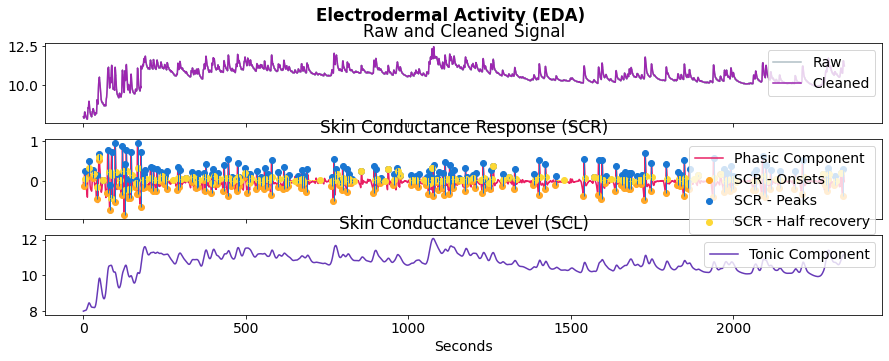

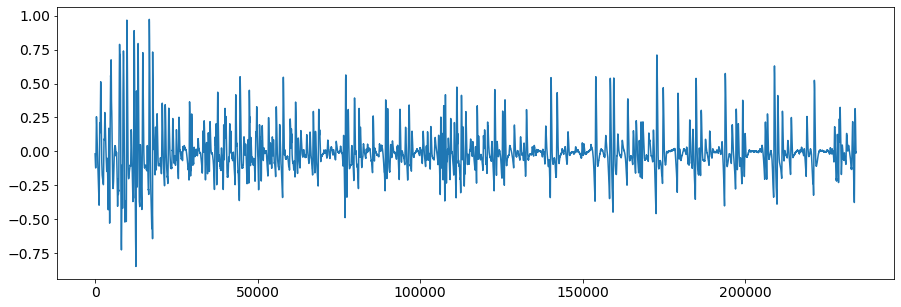

In [53]:
signals, info = nk.eda_process(pat1_eda_new, sampling_rate=100)
nk.eda_plot(signals, sampling_rate=100)
pat1_eda_phasic = signals['EDA_Phasic']
plt.show()
plt.plot(pat1_eda_phasic)
plt.show()

    if i cut eda signal i have to cut also pupil signal

TODO in realtà forse non è detto

In [37]:
if len(pat1_pupil)>cut_index:
    pat1_pupil = pat1_pupil[:cut_index]
    print("pupil cutted")

In [38]:
len(pat1_pupil)

112000

In [39]:
# total length in seconds of the signal
len_sec = len(pat1_eda_new)*0.01
len_sec

2341.3

In [40]:
NUM_TRIALS=160

In [41]:
len_sec/NUM_TRIALS

14.633125000000001

14.6 seconds every trial i think it's too much but i cut for example only first 20 seconds

latency of eda signal 5000 msec

In [55]:
pat1_eda_cut = pat1_eda_new[:100*20]

### plot near first 20 secs eda and first 20 secs pupil

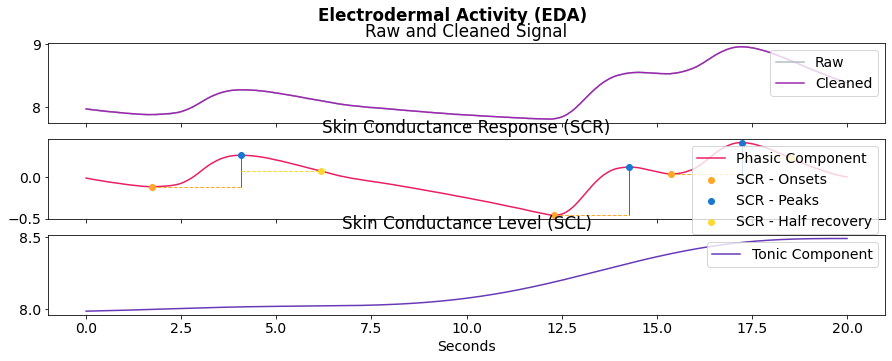

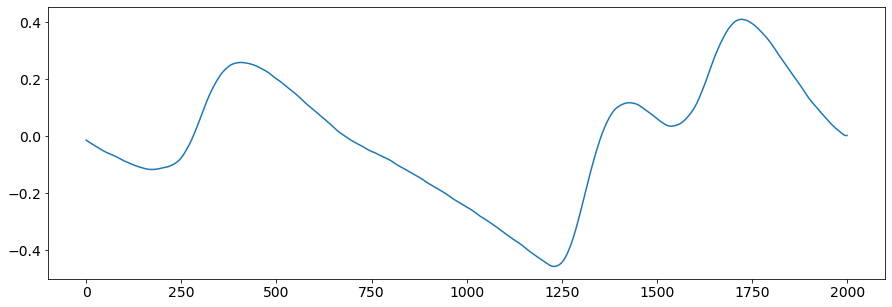

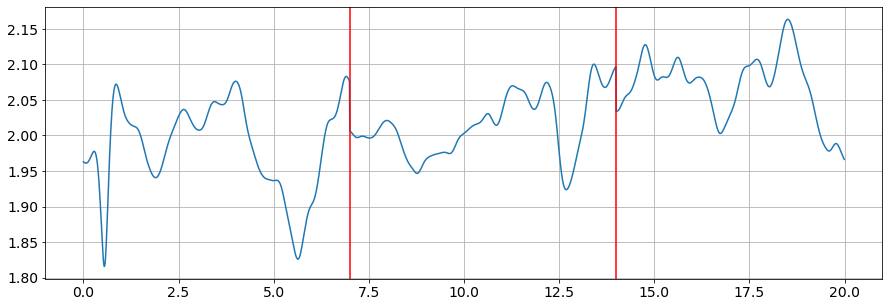

In [60]:
signals_cut, info_cut = nk.eda_process(pat1_eda_cut, sampling_rate=100)
nk.eda_plot(signals_cut, sampling_rate=100)
pat1_eda_phasic_cut = signals_cut['EDA_Phasic']
plt.show()
plt.plot(pat1_eda_phasic_cut)
plt.show()
# first 20 seconds
X_20 = X[:20*100]
Y_20 = Y[:20*100]
plt.plot(X_20, Y_20)
plt.axvline(7, color='red')
plt.axvline(14, color='red')
#plt.xticks(np.arange(0,21,2))
plt.grid()
plt.show()

### try to calculate correlation coefficient

In [384]:
min_ = min(len(pat1_pupil), len(pat1_eda_phasic))
min_

112000

In [385]:
range_ = abs(len(pat1_pupil) - len(pat1_eda_new))
range_

172208

In [386]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(pat1_pupil)[:min_]
    y_simple = np.array(pat1_eda_new)[i:min_ + i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ", max_rho, index_max)
print("min ", min_rho, index_min)

KeyboardInterrupt: 

# work on heart data

In [7]:
result = pyreadr.read_r('osfstorage-archive/RDS/heart.rds')
df = result[None]
df

,subject,trial,shock,shockPrior,hrbl,time,HRchange,threat,pair,diagnostic,sex,phase,pairs
0,1,1,False,False,99.033876,0.5,0.966124,1,4,mouth/nose,female,PreAcq,1
1,1,1,False,False,99.033876,1.0,0.659147,1,4,mouth/nose,female,PreAcq,1
2,1,1,False,False,99.033876,1.5,0.633898,1,4,mouth/nose,female,PreAcq,1
3,1,1,False,False,99.033876,2.0,-0.206438,1,4,mouth/nose,female,PreAcq,1
4,1,1,False,False,99.033876,2.5,-2.501368,1,4,mouth/nose,female,PreAcq,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75675,55,160,False,False,64.235230,3.5,-4.088215,6,3,eyes,female,Gen,2
75676,55,160,False,False,64.235230,4.0,-4.114989,6,3,eyes,female,Gen,2
75677,55,160,False,False,64.235230,4.5,-0.942471,6,3,eyes,female,Gen,2
75678,55,160,False,False,64.235230,5.0,-1.001967,6,3,eyes,female,Gen,2


In [8]:
result = pyreadr.read_r('osfstorage-archive/RDS/heart.wide.rds')
df = result[None]
df

,subject,HR_PreAcq_CS-,HR_PreAcq_CS+,HR_Acq_CS-,HR_Acq_CS+,HR_Gen_all_CS-,HR_Gen_all_GS1,HR_Gen_all_GS2,HR_Gen_all_GS3,HR_Gen_all_GS4,HR_Gen_all_CS+,HR_Gen_all_lds,HR_Gen_all_diff,HR_Gen_all_level,HR_Gen_eyes_lds,HR_Gen_eyes_diff,HR_Gen_eyes_level,HR_Gen_mn_lds,HR_Gen_mn_diff,HR_Gen_mn_level
0,1,-4.355103,-3.402086,1.304726,1.522062,0.548240,-2.302359,0.670426,-0.040410,1.917760,0.913896,0.669714,0.365656,0.284592,1.402056,0.944670,-0.270620,-0.062629,-0.213359,0.839805
1,2,-3.452441,0.166759,-0.706629,-1.140099,-0.295604,-1.265690,-0.218763,2.033250,-5.005028,-0.432495,0.750008,-0.136891,-0.864055,0.086439,-2.960345,-0.450405,1.413577,2.686563,-1.277705
2,3,0.934985,-0.806902,0.061561,0.625418,0.191419,-1.018601,-0.380569,-0.332560,-0.005700,-1.007131,0.026502,-1.198550,-0.425524,-0.543983,-2.465007,-0.587674,0.596987,0.067907,-0.263374
3,4,0.150401,0.127759,-1.624846,0.869174,-2.277459,-0.136754,-0.836794,-1.744185,-1.842944,-1.418881,-0.708001,0.858578,-1.376170,-0.484778,-0.120058,-1.174937,-0.931223,1.837213,-1.577402
4,5,-3.355501,-3.311652,2.908239,1.038574,4.535475,3.090576,1.907950,-1.417337,2.555222,-2.547137,-0.539934,-7.082612,1.354125,0.703110,-4.396336,1.344381,-1.782977,-9.768889,1.363869
5,6,1.444876,-2.361436,-3.733209,-0.980997,1.179057,0.349132,-1.471090,-0.893095,-4.041528,-1.422850,1.392249,-2.601907,-1.050062,2.832743,-5.395479,-1.152516,-0.048245,0.191665,-0.947609
6,7,-2.048634,-1.662008,-1.740703,-1.293158,-2.013166,-0.246892,-3.186152,-0.794749,-0.837260,-2.131119,-0.805879,-0.117953,-1.534890,0.260563,-1.946271,-0.807444,-1.872322,1.710365,-2.262335
7,8,-0.073179,-0.751750,-0.379881,0.265791,-0.196247,-0.702296,-0.673383,-1.559649,-0.425624,-1.017657,0.233286,-0.821410,-0.762476,0.422642,1.109855,-1.285791,0.043930,-2.752676,-0.239161
8,10,-1.661789,-1.800592,-0.178181,-1.985808,-1.663032,-0.692801,0.096303,-0.597480,-1.063310,-0.429006,-0.481697,1.234026,-0.724888,-0.624526,0.922052,-0.202278,-0.338868,1.546000,-1.247497
9,13,-0.170158,2.822207,0.337890,-0.563633,0.146087,-1.111670,0.123301,-1.443408,-1.182590,-1.035896,0.458687,-1.181983,-0.750696,0.133117,-1.119617,-0.867240,0.784257,-1.244350,-0.634151
